In [1]:
import pandas as pd
import numpy as np
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import matthews_corrcoef
from xgboost import XGBClassifier
import lightgbm
from lightgbm import LGBMClassifier
import os
%matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
VALIDATION = True
DATASET = 2

train_1= pd.read_csv(os.path.join(os.getcwd(),f"Dataset_1_Training.csv"),index_col=0)
test_1 = pd.read_csv(os.path.join(os.getcwd(),f"Dataset_1_Testing.csv"),index_col=0)

train_2 = pd.read_csv(os.path.join(os.getcwd(),f"Dataset_2_Training.csv"),index_col=0)
test_2 = pd.read_csv(os.path.join(os.getcwd(),f"Dataset_2_Testing.csv"),index_col=0)

In [3]:
train_1.T.head() 

ID_REF,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_22276,gene_22277,gene_22278,gene_22279,gene_22280,gene_22281,gene_22282,gene_22283,CO: 1,CO: 2
Train_01,12.4440,8.3774,6.7866,10.2851,5.9064,8.3767,8.0356,6.6745,6.2325,6.8450,...,15.6236,15.2785,3.2915,3.6526,2.6412,1.2652,3.0690,2.0271,0.0,1.0
Train_02,12.2005,7.8592,8.0963,10.4624,4.9582,9.2973,7.0581,6.4607,6.9047,5.8878,...,15.3234,15.1286,3.3811,2.5880,4.4798,4.8098,3.1637,2.4758,0.0,1.0
Train_03,12.6709,8.6762,7.4812,10.1887,5.2332,9.1721,8.6061,7.0932,6.5940,5.6843,...,15.4604,15.2674,3.1665,3.9743,5.2597,4.3815,2.8034,2.4669,0.0,0.0
Train_04,11.6619,8.2557,7.9923,10.7705,6.3296,9.3777,8.4776,6.5878,6.0877,6.5169,...,15.5185,15.1655,4.0045,3.8503,5.9114,0.7882,3.1831,3.4820,0.0,0.0
Train_05,11.8397,8.7971,7.8321,10.2869,5.8389,7.0841,7.3419,7.3167,6.3456,6.1708,...,15.3143,14.9506,3.0514,3.2946,5.1537,3.9179,3.1881,2.9769,0.0,0.0


In [4]:
train_2.T.head() 

ID_REF,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_54670,gene_54671,gene_54672,gene_54673,gene_54674,gene_54675,CO: 3,CO: 4,CO: 5,CO: 6
Train_001,8.2843,8.7174,8.3019,11.8611,4.6883,9.8524,8.2301,4.8406,7.5667,8.4165,...,6.3546,7.2572,3.6080,3.9483,4.5200,4.5195,0.0,0.0,1.0,1.0
Train_002,9.0419,8.8729,8.4559,11.2112,5.7059,10.2263,7.9439,4.6463,6.1828,7.0852,...,4.9707,6.4847,5.1648,1.8369,3.8223,3.4288,0.0,0.0,1.0,1.0
Train_003,7.6171,8.3904,8.1184,11.0341,5.8050,9.5912,6.8044,4.0878,8.1184,7.3179,...,3.9571,6.2647,3.4216,4.7911,5.4910,3.8438,0.0,0.0,0.0,1.0
Train_004,9.6283,8.3840,9.9061,12.0571,5.1193,10.5774,8.1628,5.3257,5.6398,7.6829,...,4.6561,7.5776,6.2385,4.1413,5.3047,5.4693,0.0,0.0,0.0,1.0
Train_005,10.1735,9.1585,7.9649,11.0843,5.0119,8.7764,8.1379,3.6227,7.7334,7.6336,...,3.7007,3.8720,3.1052,5.4053,5.3599,2.8328,0.0,0.0,0.0,1.0


In [5]:
list(train_1.T.columns[-2:])

['CO: 1', 'CO: 2']

In [6]:
list(train_2.T.columns[-4:])

['CO: 3', 'CO: 4', 'CO: 5', 'CO: 6']

In [7]:
train_1.T.shape

(130, 22285)

In [8]:
train_2.T.shape

(340, 54679)

In [9]:
test_1.T.shape

(100, 22283)

In [10]:
test_2.T.shape

(214, 54675)

In [11]:
train_1 = train_1.T
test_1 = test_1.T
train_2= train_2.T
test_2 = test_2.T

In [12]:
train_small = train_1.iloc[:,1:10]
train_small

ID_REF,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10
Train_01,8.3774,6.7866,10.2851,5.9064,8.3767,8.0356,6.6745,6.2325,6.8450
Train_02,7.8592,8.0963,10.4624,4.9582,9.2973,7.0581,6.4607,6.9047,5.8878
Train_03,8.6762,7.4812,10.1887,5.2332,9.1721,8.6061,7.0932,6.5940,5.6843
Train_04,8.2557,7.9923,10.7705,6.3296,9.3777,8.4776,6.5878,6.0877,6.5169
Train_05,8.7971,7.8321,10.2869,5.8389,7.0841,7.3419,7.3167,6.3456,6.1708
...,...,...,...,...,...,...,...,...,...
Train_126,8.0073,7.1604,9.3056,2.7648,9.0741,5.9092,5.2527,5.7626,3.1870
Train_127,8.7849,8.1964,8.5677,3.2988,9.7455,6.6631,3.9661,7.8396,6.5435
Train_128,8.6856,6.9133,9.7126,6.4256,9.6322,7.1716,3.9828,7.1508,6.2048
Train_129,8.6771,4.9542,9.6943,4.0177,9.4154,8.1591,6.9346,8.3595,6.4817


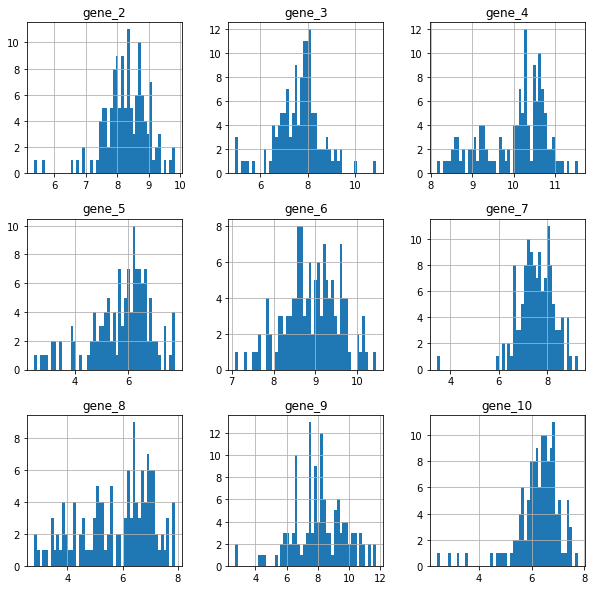

In [13]:
train_small.hist(bins = 50, figsize = (10,10))
plt.show()

In [14]:
test_cols_1 = ['CO: 1','CO: 2']
test_cols_2 = ['CO: 3','CO: 4','CO: 5','CO: 6']
test_cols = ['CO: 1','CO: 2','CO: 3','CO: 4','CO: 5','CO: 6']
scaler = preprocessing.StandardScaler()

In [15]:
X_1 = train_1.drop(test_cols_1, axis=1, errors='ignore')
y_1 = train_1[test_cols_1]
X_test_1 = test_1.drop(test_cols_1, axis=1, errors='ignore')
scaler.fit(X_1)

StandardScaler()

In [16]:
scaledX_1 = scaler.transform(X_1)
scaledXtest_1 = scaler.transform(X_test_1)
scaledX_1.shape

(130, 22283)

In [17]:
X_2 = train_2.drop(test_cols_2, axis=1, errors='ignore')
y_2 = train_2[test_cols_2]
X_test_2 = test_2.drop(test_cols_2, axis=1, errors='ignore')
scaler.fit(X_2)

StandardScaler()

In [18]:
scaledX_2 = scaler.transform(X_2)
scaledXtest_2 = scaler.transform(X_test_2)
scaledX_2.shape

(340, 54675)

In [19]:
X_1 = scaledX_1
X_test_1 = scaledXtest_1
X_2 = scaledX_2
X_test_2 = scaledXtest_2

In [20]:
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_1, y_1, stratify=y_1, test_size = 0.3, random_state = 42)
X_train_1.shape, X_val_1.shape
#y_train.head()

((91, 22283), (39, 22283))

In [21]:
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_2, y_2, stratify=y_2, test_size = 0.3, random_state = 42)
X_train_2.shape, X_val_2.shape
#y_train.head()

((238, 54675), (102, 54675))

In [22]:
np.array(y_train_1[test_cols[0]])

array([1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0.])

In [23]:
np.shape(y_train_1)

(91, 2)

In [24]:
#for i in range(len(test_cols)):
    #print(np.array(y_train[test_cols[i]]))

In [25]:
# model = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

# model.fit(scaledX,y)
# predictions = model.predict(scaledXtest)
# model.score(scaledXtest,ytest)

In [42]:
def get_model():
    model = RandomForestClassifier()
    return model

In [45]:
predictions = []
ypred = []
yval  = []
param = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000],'max_depth':[1,5,10,15,20]}
for i in range(len(test_cols)):
    if i <= 1:
        y_train_11 = np.array(y_train_1[test_cols[i]])
        y_val_11 = np.array(y_val_1[test_cols[i]])
        y_train_11 = y_train_11.reshape(y_train_11.shape[0],)
        y_val_11 = y_val_11.reshape(y_val_11.shape[0],)
        rf1 = get_model()
        model_1 = GridSearchCV(rf1,param)
        #model_1 = XGBClassifier(max_depth = 5, learning_rate = 0.01, eval_metric = 'mlogloss', n_estimators = 75, use_label_encoder=False)
        #param_1 = [{'max_depth':[10,20,30],'learning_rate':[0.05,0.1,0.15],'n_estimators':[50,100,200]}]
        #model_1 = GridSearchCV(xgb1,param_1,cv=5,scoring="neg_mean_squared_error",return_train_score = True)
        
        model_1.fit(X_train_1,y_train_11)
        predictions.extend(model_1.predict(X_val_1))
        print(test_cols[i],model_1.score(X_val_1,y_val_11))
        ypred.extend(model_1.predict(X_test_1))
        yval.extend(y_val_11)
    
    if i > 1:
        y_train_12 = np.array(y_train_2[test_cols[i]])
        y_val_12 = np.array(y_val_2[test_cols[i]])
        y_train_12 = y_train_12.reshape(y_train_12.shape[0],)
        y_val_12 = y_val_12.reshape(y_val_12.shape[0],)
        rf2 = get_model()
        model_2 = GridSearchCV(rf2,param)
        #model_2 = LGBMClassifier(max_depth=20,n_estimators=1000,lambda_l2=2,bagging_fraction=0.75,feature_fraction=0.6)
        #model_2 = XGBClassifier(max_depth = 5, learning_rate = 0.01, eval_metric = 'mlogloss', n_estimators = 75, use_label_encoder=False)
        #param_2 = [{'max_depth':[10,20,30],'learning_rate':[0.05,0.1,0.15],'n_estimators':[50,100,200]}]
        #model_2 = GridSearchCV(XGBClassifier(eval_metric='mlogloss'),param_2,cv=5,scoring="neg_mean_squared_error",return_train_score = True)
        
        model_2.fit(X_train_2,y_train_12)
        predictions.extend(model_2.predict(X_val_2))
        print(test_cols[i],model_2.score(X_val_2,y_val_12))
        ypred.extend(model_2.predict(X_test_2))
        yval.extend(y_val_12)
    
    #X_test = test.drop(test_cols, axis=1, errors='ignore')
    #scaledX = scaler.transform(X)
    #scaledXtest = scaler.transform(Xtest)  
    #estimator = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)


    

CO: 1 0.7435897435897436
CO: 2 0.6410256410256411
CO: 3 0.7843137254901961
CO: 4 0.8529411764705882
CO: 5 0.803921568627451
CO: 6 0.5686274509803921


In [46]:
#for i in range(len(test_cols)):
#    if i<=1:
#        print(f"CO: {i+1} -",matthews_corrcoef(y_val_1[f'CO: {i+1}'],predictions[i]))
#    else:
#        print(f"CO: {i+1} -",matthews_corrcoef(y_val_2[f'CO: {i+1}'],predictions[i]))

In [47]:
ypred = np.array(ypred)
yval = np.array(yval)
predictions = np.array(predictions)

In [48]:
ypred.shape

(1056,)

In [49]:
ypred1 = pd.DataFrame(ypred)
yval1 = pd.DataFrame(yval)
predictions1 = pd.DataFrame(predictions)

In [50]:
yval1.shape

(486, 1)

In [51]:
matthews_corrcoef(yval1,predictions1)

0.4156137542982287

In [54]:
model_1.best_estimator_

RandomForestClassifier(max_depth=15, n_estimators=700)

In [55]:
model_2.best_estimator_

RandomForestClassifier(max_depth=15, n_estimators=200)

In [ ]:
submission = pd.DataFrame(ypred,columns=['Predicted'])
submission.index.name = 'Id'
#submission = pd.read_csv('dummy_submission.csv')
submission.Predicted = np.array(ypred,dtype=int)
submission.to_csv('RF(0.511).csv',index=True)
print(submission.shape)

In [ ]:
submission